In [2]:
# Самое необходимое и нужное. Тут и происхожит обучение. В данном случает метод SVM и в дополнение сравнение с LinearSVC

import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import svm
from sklearn.svm import LinearSVC

df = pd.read_csv('microarray_BRCA_public.csv')
y = df.type
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)
X = df.drop(df.columns[0], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, test_size=0.1)
dict = { 1 : 'basal' , 3 : 'luminal_A', 4 : 'luminal_B', 0 : 'HER', 2 : 'cell_line', 5 : 'normal'}


clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
result = list(map(dict.get, prediction))
y_test_cancer_type = list(map(dict.get, y_test))


lin_clf = svm.LinearSVC(max_iter=10000, dual=False).fit(X_train, y_train)
lin_clf.fit(X_train, y_train)

# Смотрим как работает 

print( 'Результаты SVM:', clf.score(X_test, y_test))

print( 'Результаты LinearSVC:', lin_clf.score(X_test, y_test))




Результаты SVM: 0.5
Результаты LinearSVC: 0.9166666666666666


In [5]:
# Базовая проверка 

print( 'Результаты SVM:', clf.score(X_test, y_test))

print( 'Результаты LinearSVC:', lin_clf.score(X_test, y_test))


Результаты SVM: 0.5
Результаты LinearSVC: 0.9166666666666666


[[1 0 0 0 0]
 [0 4 0 0 0]
 [0 0 0 5 0]
 [0 0 0 1 0]
 [0 0 0 1 0]]


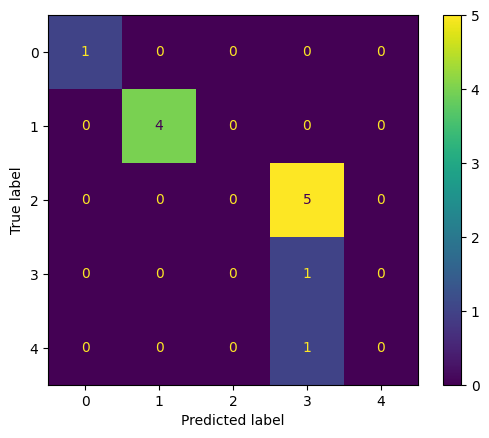

In [7]:
# Еще один метод проверки 

from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test, prediction)
print(cm)
vis = ConfusionMatrixDisplay(confusion_matrix=cm)
vis.plot()
plt.show()

In [8]:
# Кросс-валидация

from sklearn.model_selection import cross_val_score


scores_SVM = cross_val_score(clf, X, y, cv=5)
print('Cross-validation scores ovr:', scores_SVM)

scores_SVC = cross_val_score(lin_clf, X, y, cv=5)
print('Cross-validation scores ovr:', scores_SVC)